In [1]:
# Import required dependencies/packages

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import glob 
import os 
import math
from matplotlib.ticker import FuncFormatter
#from matplotlib.dates import DateFormatter, MonthLocatorc

In [2]:
#Reading data from csv - GDP(nominal data)
dg = pd.read_csv('resources/cleaned_GDP_Data.csv')
dg = dg.fillna(0)
dg.head(100)

,Country Name,Country Code,Year,GDP
0,Aruba,ABW,1960,0.000000e+00
1,Africa Eastern and Southern,AFE,1960,2.112502e+10
2,Afghanistan,AFG,1960,5.377778e+08
3,Africa Western and Central,AFW,1960,1.044764e+10
4,Angola,AGO,1960,0.000000e+00
...,...,...,...,...
95,Ireland,IRL,1960,1.939330e+09
96,"Iran, Islamic Rep.",IRN,1960,4.199134e+09
97,Iraq,IRQ,1960,1.683919e+09
98,Iceland,ISL,1960,2.484343e+08


In [3]:
# List of all columns
list(dg.columns.values)

['Country Name', 'Country Code', 'Year', 'GDP']

In [4]:
# Rename columns
dg.columns = ['Country', 'Code', 'Year', 'GDP']

In [5]:
dg

,Country,Code,Year,GDP
0,Aruba,ABW,1960,0.000000e+00
1,Africa Eastern and Southern,AFE,1960,2.112502e+10
2,Afghanistan,AFG,1960,5.377778e+08
3,Africa Western and Central,AFW,1960,1.044764e+10
4,Angola,AGO,1960,0.000000e+00
...,...,...,...,...
14044,Kosovo,XKX,2022,9.429156e+09
14045,"Yemen, Rep.",YEM,2022,0.000000e+00
14046,South Africa,ZAF,2022,4.058700e+11
14047,Zambia,ZMB,2022,2.978445e+10


In [6]:
dm = dg.groupby(["Country"])
dm.count().head(1000)

,Code,Year,GDP
Country,,,
Afghanistan,63,63,63
Africa Eastern and Southern,63,63,63
Africa Western and Central,63,63,63
Albania,63,63,63
Algeria,63,63,63
...,...,...,...
Virgin Islands (U.S.),63,63,63
West Bank and Gaza,63,63,63
"Yemen, Rep.",63,63,63


In [7]:
#Reading data from csv - GDP(nominal data)
dp = pd.read_csv('resources/cleaned_World_Population.csv')
dp = dp.fillna(0)
dp.head(100)

,Country,ISO3 Alpha-code,ISO2 Alpha-code,Year,Total Pop. Jan (thousands),Total Pop. July (thousands),Male Pop. July (thousands),Female Pop. July (thousands),Pop. Density (persons/sq km),Pop. Sex Ratio (males per 100 females),...,"Male Mortality before Age 60 (per 1,000 males)","Female Mortality before Age 60 (per 1,000 females)","Mortality 15-50 (per 1,000 alive at age 15)","Male Mortality 15-50 (per 1,000 males alive at age 15)","Female Mortality 15-50 (per 1,000 females alive at age 15)","Mortality 15-60 (per 1,000 alive at age 15)","Male Mortality 15-60 (per 1,000 males alive at age 15)","Female Mortality 15-60 (per 1,000 females alive at age 15)",Net Migrants (thousands),"Net Migration Rate (per 1,000)"
0,Burundi,BDI,BI,1950,2229.0,2254.0,1080.0,1174.0,86.9,91.9,...,642.0,595.0,291.0,308.0,275.0,424.0,453.0,398.0,13.0,5.9
1,Burundi,BDI,BI,1951,2279.0,2303.0,1105.0,1199.0,88.8,92.1,...,641.0,589.0,288.0,308.0,270.0,421.0,452.0,392.0,13.0,5.7
2,Burundi,BDI,BI,1952,2328.0,2352.0,1129.0,1223.0,90.6,92.3,...,638.0,588.0,288.0,307.0,271.0,420.0,451.0,392.0,14.0,5.8
3,Burundi,BDI,BI,1953,2375.0,2399.0,1153.0,1246.0,92.5,92.5,...,635.0,584.0,286.0,305.0,269.0,418.0,449.0,390.0,15.0,6.2
4,Burundi,BDI,BI,1954,2423.0,2447.0,1177.0,1270.0,94.3,92.7,...,632.0,580.0,284.0,304.0,266.0,416.0,447.0,387.0,15.0,5.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Comoros,COM,KM,1973,260.0,264.0,132.0,131.0,141.7,100.9,...,577.0,497.0,255.0,286.0,221.0,388.0,433.0,337.0,1.0,2.9
96,Comoros,COM,KM,1974,268.0,272.0,137.0,135.0,146.0,101.0,...,568.0,489.0,249.0,278.0,216.0,381.0,425.0,332.0,1.0,3.4
97,Comoros,COM,KM,1975,276.0,280.0,141.0,139.0,150.5,101.1,...,583.0,506.0,264.0,293.0,231.0,400.0,443.0,350.0,1.0,3.8
98,Comoros,COM,KM,1976,284.0,289.0,145.0,144.0,155.2,101.2,...,552.0,474.0,240.0,268.0,208.0,372.0,414.0,323.0,1.0,4.1


In [8]:
# List of all columns
list(dp.columns.values)

['Country',
 'ISO3 Alpha-code',
 'ISO2 Alpha-code',
 'Year',
 'Total Pop. Jan (thousands)',
 'Total Pop. July (thousands)',
 'Male Pop. July (thousands)',
 'Female Pop. July (thousands)',
 'Pop. Density (persons/sq km)',
 'Pop. Sex Ratio (males per 100 females)',
 'Median Age (years)',
 'Natural Change (thousands)',
 'Rate of Natural Change (per 1,000)',
 'Pop. Change (thousands)',
 'Pop. Growth Rate (%)',
 'Pop. Annual Doubling Time (years)',
 'Births (thousands)',
 'Births 15-19 (thousands)',
 'Crude Birth Rate (per 1,000)',
 'Total Fertility Rate',
 'Net Reproduction Rate',
 'Mean Age Childbearing (years)',
 'Sex Ratio at Birth (males per 100 females)',
 'Total Deaths (thousands)',
 'Male Deaths (thousands)',
 'Female Deaths (thousands)',
 'Crude Death Rate (per 1,000)',
 'Life Expectancy at Birth (years)',
 'Male Life Expectancy at Birth (years)',
 'Female Life Expectancy at Birth (years)',
 'Life Expectancy at Age 15 (years)',
 'Male Life Expectancy at Age 15 (years)',
 'Female Li

In [9]:
dp.drop(['ISO2 Alpha-code', 'Natural Change (thousands)', 'Rate of Natural Change (per 1,000)', 
             'Pop. Change (thousands)'], axis=1, inplace=True)

In [10]:
list(dp.columns.values)

['Country',
 'ISO3 Alpha-code',
 'Year',
 'Total Pop. Jan (thousands)',
 'Total Pop. July (thousands)',
 'Male Pop. July (thousands)',
 'Female Pop. July (thousands)',
 'Pop. Density (persons/sq km)',
 'Pop. Sex Ratio (males per 100 females)',
 'Median Age (years)',
 'Pop. Growth Rate (%)',
 'Pop. Annual Doubling Time (years)',
 'Births (thousands)',
 'Births 15-19 (thousands)',
 'Crude Birth Rate (per 1,000)',
 'Total Fertility Rate',
 'Net Reproduction Rate',
 'Mean Age Childbearing (years)',
 'Sex Ratio at Birth (males per 100 females)',
 'Total Deaths (thousands)',
 'Male Deaths (thousands)',
 'Female Deaths (thousands)',
 'Crude Death Rate (per 1,000)',
 'Life Expectancy at Birth (years)',
 'Male Life Expectancy at Birth (years)',
 'Female Life Expectancy at Birth (years)',
 'Life Expectancy at Age 15 (years)',
 'Male Life Expectancy at Age 15 (years)',
 'Female Life Expectancy at Age 15 (years)',
 'Life Expectancy at Age 65 (years)',
 'Male Life Expectancy at Age 65 (years)',
 'F

In [11]:
# Rename columns
dp.columns = ['Country', 'Code', 'Year', 'Pop01(k)', 'Pop07(k)', 'M_Pop07(k)', 'F_Pop07(k)', 
              'Density(/sqkm)', 'SexRatio', 'MedianAge', 'GrowthRate(%)', 'DoublingTime', 
              'Births', 'Births15-19Y', 'CrudeBirthRate', 'FertilityRate', 'ReproductionRate', 
              'ChildbearingMeanAge', 'SexRatio(Birth)', 'TotalDeaths', 'M_Deaths', 'F_Deaths', 
              'CrudeDeathRate', 'LifeExp(Birth)', 'M_LifeExp(Birth)', 'F_LifeExp(Birth)',
              'LifeExp(15Y)', 'M_LifeExp(15Y)', 'F_LifeExp(15Y)', 'LifeExp(65Y)',
              'M_LifeExp(65Y)', 'F_LifeExp(65Y)', 'LifeExp(80Y)', 'M_LifeExp(80Y)',
              'F_LifeExp(80Y)', 'InfantDeaths', 'InfantMortalityRate', 
              'LiveBirthsSurvivingtoAge1', 'Under5Deaths', 'Under5Mortality', 
              'Mortality(b40)', 'M_Mortality(b40)','F_Mortality(b40)', 
              'Mortality(b60)', 'M_Mortality(b60)', 'F_Mortality(b60)',
              'Mortality(15-50)', 'M_Mortality(15-50)', 'F_Mortality(15-50)',
              'Mortality(15-60)', 'M_Mortality(15-60)', 'F_Mortality(15-60)',
              'NetMigrants', 'NetMigrationRate']


In [12]:
dp

,Country,Code,Year,Pop01(k),Pop07(k),M_Pop07(k),F_Pop07(k),Density(/sqkm),SexRatio,MedianAge,...,M_Mortality(b60),F_Mortality(b60),Mortality(15-50),M_Mortality(15-50),F_Mortality(15-50),Mortality(15-60),M_Mortality(15-60),F_Mortality(15-60),NetMigrants,NetMigrationRate
0,Burundi,BDI,1950,2229.0,2254.0,1080.0,1174.0,86.9,91.9,18.3,...,642.0,595.0,291.0,308.0,275.0,424.0,453.0,398.0,13.0,5.9
1,Burundi,BDI,1951,2279.0,2303.0,1105.0,1199.0,88.8,92.1,18.1,...,641.0,589.0,288.0,308.0,270.0,421.0,452.0,392.0,13.0,5.7
2,Burundi,BDI,1952,2328.0,2352.0,1129.0,1223.0,90.6,92.3,17.9,...,638.0,588.0,288.0,307.0,271.0,420.0,451.0,392.0,14.0,5.8
3,Burundi,BDI,1953,2375.0,2399.0,1153.0,1246.0,92.5,92.5,17.7,...,635.0,584.0,286.0,305.0,269.0,418.0,449.0,390.0,15.0,6.2
4,Burundi,BDI,1954,2423.0,2447.0,1177.0,1270.0,94.3,92.7,17.5,...,632.0,580.0,284.0,304.0,266.0,416.0,447.0,387.0,15.0,5.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17059,Wallis and Futuna Islands,WLF,2017,12.0,12.0,6.0,6.0,85.3,93.6,33.8,...,92.0,103.0,31.0,27.0,34.0,83.0,82.0,83.0,0.0,-16.7
17060,Wallis and Futuna Islands,WLF,2018,12.0,12.0,6.0,6.0,84.4,93.3,34.4,...,99.0,89.0,29.0,29.0,29.0,80.0,89.0,72.0,0.0,-14.4
17061,Wallis and Futuna Islands,WLF,2019,12.0,12.0,6.0,6.0,83.7,93.1,35.0,...,78.0,80.0,24.0,22.0,26.0,67.0,69.0,64.0,0.0,-14.5
17062,Wallis and Futuna Islands,WLF,2020,12.0,12.0,6.0,6.0,83.2,93.0,35.5,...,86.0,86.0,27.0,25.0,28.0,73.0,76.0,70.0,0.0,-7.1


In [13]:
dm = dp.groupby(["Country"])
dm.count().head(1000)

,Code,Year,Pop01(k),Pop07(k),M_Pop07(k),F_Pop07(k),Density(/sqkm),SexRatio,MedianAge,GrowthRate(%),...,M_Mortality(b60),F_Mortality(b60),Mortality(15-50),M_Mortality(15-50),F_Mortality(15-50),Mortality(15-60),M_Mortality(15-60),F_Mortality(15-60),NetMigrants,NetMigrationRate
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,72,72,72,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,72,72,72
Albania,72,72,72,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,72,72,72
Algeria,72,72,72,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,72,72,72
American Samoa,72,72,72,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,72,72,72
Andorra,72,72,72,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,72,72,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna Islands,72,72,72,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,72,72,72
Western Sahara,72,72,72,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,72,72,72
Yemen,72,72,72,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,72,72,72


In [14]:
df           = pd.merge(dg, dp, how="right", on=['Country', 'Year', 'Code'])
#print(dp)
df           = df.dropna()
#print(dp)
list(df.columns.values)

['Country',
 'Code',
 'Year',
 'GDP',
 'Pop01(k)',
 'Pop07(k)',
 'M_Pop07(k)',
 'F_Pop07(k)',
 'Density(/sqkm)',
 'SexRatio',
 'MedianAge',
 'GrowthRate(%)',
 'DoublingTime',
 'Births',
 'Births15-19Y',
 'CrudeBirthRate',
 'FertilityRate',
 'ReproductionRate',
 'ChildbearingMeanAge',
 'SexRatio(Birth)',
 'TotalDeaths',
 'M_Deaths',
 'F_Deaths',
 'CrudeDeathRate',
 'LifeExp(Birth)',
 'M_LifeExp(Birth)',
 'F_LifeExp(Birth)',
 'LifeExp(15Y)',
 'M_LifeExp(15Y)',
 'F_LifeExp(15Y)',
 'LifeExp(65Y)',
 'M_LifeExp(65Y)',
 'F_LifeExp(65Y)',
 'LifeExp(80Y)',
 'M_LifeExp(80Y)',
 'F_LifeExp(80Y)',
 'InfantDeaths',
 'InfantMortalityRate',
 'LiveBirthsSurvivingtoAge1',
 'Under5Deaths',
 'Under5Mortality',
 'Mortality(b40)',
 'M_Mortality(b40)',
 'F_Mortality(b40)',
 'Mortality(b60)',
 'M_Mortality(b60)',
 'F_Mortality(b60)',
 'Mortality(15-50)',
 'M_Mortality(15-50)',
 'F_Mortality(15-50)',
 'Mortality(15-60)',
 'M_Mortality(15-60)',
 'F_Mortality(15-60)',
 'NetMigrants',
 'NetMigrationRate']

In [15]:
df

,Country,Code,Year,GDP,Pop01(k),Pop07(k),M_Pop07(k),F_Pop07(k),Density(/sqkm),SexRatio,...,M_Mortality(b60),F_Mortality(b60),Mortality(15-50),M_Mortality(15-50),F_Mortality(15-50),Mortality(15-60),M_Mortality(15-60),F_Mortality(15-60),NetMigrants,NetMigrationRate
10,Burundi,BDI,1960,1.960000e+08,2720.0,2747.0,1327.0,1419.0,105.8,93.5,...,614.0,561.0,276.0,296.0,258.0,405.0,437.0,376.0,15.0,5.3
11,Burundi,BDI,1961,2.030000e+08,2774.0,2816.0,1362.0,1454.0,108.5,93.7,...,611.0,559.0,275.0,295.0,256.0,404.0,435.0,375.0,15.0,5.4
12,Burundi,BDI,1962,2.135000e+08,2858.0,2887.0,1398.0,1489.0,111.3,93.9,...,607.0,559.0,274.0,292.0,258.0,403.0,432.0,377.0,15.0,5.3
13,Burundi,BDI,1963,2.327500e+08,2916.0,2948.0,1429.0,1519.0,113.6,94.1,...,603.0,555.0,273.0,291.0,256.0,401.0,430.0,374.0,12.0,3.9
14,Burundi,BDI,1964,2.607500e+08,2980.0,3033.0,1472.0,1561.0,116.9,94.3,...,602.0,550.0,271.0,290.0,253.0,399.0,430.0,371.0,30.0,9.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16987,Tuvalu,TUV,2017,4.527661e+07,11.0,11.0,6.0,5.0,360.9,107.0,...,404.0,243.0,175.0,217.0,123.0,306.0,383.0,219.0,0.0,-14.2
16988,Tuvalu,TUV,2018,4.801522e+07,11.0,11.0,6.0,5.0,362.2,106.9,...,404.0,241.0,175.0,217.0,123.0,307.0,383.0,218.0,0.0,-5.2
16989,Tuvalu,TUV,2019,5.412320e+07,11.0,11.0,6.0,5.0,365.2,106.7,...,405.0,240.0,175.0,218.0,122.0,309.0,385.0,217.0,0.0,-5.2
16990,Tuvalu,TUV,2020,5.174657e+07,11.0,11.0,6.0,5.0,369.0,106.2,...,404.0,239.0,174.0,218.0,122.0,309.0,385.0,217.0,0.0,-1.4


In [16]:
df['Year'] = df['Year'].astype(int)

In [17]:
df

,Country,Code,Year,GDP,Pop01(k),Pop07(k),M_Pop07(k),F_Pop07(k),Density(/sqkm),SexRatio,...,M_Mortality(b60),F_Mortality(b60),Mortality(15-50),M_Mortality(15-50),F_Mortality(15-50),Mortality(15-60),M_Mortality(15-60),F_Mortality(15-60),NetMigrants,NetMigrationRate
10,Burundi,BDI,1960,1.960000e+08,2720.0,2747.0,1327.0,1419.0,105.8,93.5,...,614.0,561.0,276.0,296.0,258.0,405.0,437.0,376.0,15.0,5.3
11,Burundi,BDI,1961,2.030000e+08,2774.0,2816.0,1362.0,1454.0,108.5,93.7,...,611.0,559.0,275.0,295.0,256.0,404.0,435.0,375.0,15.0,5.4
12,Burundi,BDI,1962,2.135000e+08,2858.0,2887.0,1398.0,1489.0,111.3,93.9,...,607.0,559.0,274.0,292.0,258.0,403.0,432.0,377.0,15.0,5.3
13,Burundi,BDI,1963,2.327500e+08,2916.0,2948.0,1429.0,1519.0,113.6,94.1,...,603.0,555.0,273.0,291.0,256.0,401.0,430.0,374.0,12.0,3.9
14,Burundi,BDI,1964,2.607500e+08,2980.0,3033.0,1472.0,1561.0,116.9,94.3,...,602.0,550.0,271.0,290.0,253.0,399.0,430.0,371.0,30.0,9.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16987,Tuvalu,TUV,2017,4.527661e+07,11.0,11.0,6.0,5.0,360.9,107.0,...,404.0,243.0,175.0,217.0,123.0,306.0,383.0,219.0,0.0,-14.2
16988,Tuvalu,TUV,2018,4.801522e+07,11.0,11.0,6.0,5.0,362.2,106.9,...,404.0,241.0,175.0,217.0,123.0,307.0,383.0,218.0,0.0,-5.2
16989,Tuvalu,TUV,2019,5.412320e+07,11.0,11.0,6.0,5.0,365.2,106.7,...,405.0,240.0,175.0,218.0,122.0,309.0,385.0,217.0,0.0,-5.2
16990,Tuvalu,TUV,2020,5.174657e+07,11.0,11.0,6.0,5.0,369.0,106.2,...,404.0,239.0,174.0,218.0,122.0,309.0,385.0,217.0,0.0,-1.4


In [18]:
dm = df.groupby(["Country"])
dm.count().head(1000)

,Code,Year,GDP,Pop01(k),Pop07(k),M_Pop07(k),F_Pop07(k),Density(/sqkm),SexRatio,MedianAge,...,M_Mortality(b60),F_Mortality(b60),Mortality(15-50),M_Mortality(15-50),F_Mortality(15-50),Mortality(15-60),M_Mortality(15-60),F_Mortality(15-60),NetMigrants,NetMigrationRate
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,62,62,62,62,62,62,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62
Albania,62,62,62,62,62,62,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62
Algeria,62,62,62,62,62,62,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62
American Samoa,62,62,62,62,62,62,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62
Andorra,62,62,62,62,62,62,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,62,62,62,62,62,62,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62
Vanuatu,62,62,62,62,62,62,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62
Viet Nam,62,62,62,62,62,62,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62


In [19]:
#Reading data from csv - GDP(nominal data)
dl = pd.read_csv('resources/Lat_Long_Data.csv')
dl = dl.fillna(0)
dl.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [20]:
list(dl.columns.values)

['country', 'latitude', 'longitude', 'name']

In [21]:
dl.drop(['country'], axis=1, inplace=True)

In [22]:
list(dl.columns.values)

['latitude', 'longitude', 'name']

In [23]:
dl.columns = ['latitude', 'longitude', 'Country']
list(dl.columns.values)

['latitude', 'longitude', 'Country']

In [24]:
dm = dl.groupby(["Country"])
dm.count().head(1000)

,latitude,longitude
Country,,
Afghanistan,1,1
Albania,1,1
Algeria,1,1
American Samoa,1,1
Andorra,1,1
...,...,...
Wallis and Futuna,1,1
Western Sahara,1,1
Yemen,1,1


In [25]:
df           = pd.merge(df, dl, how="right", on=['Country'])
#print(dp)
df           = df.dropna()
#print(dp)
list(df.columns.values)

['Country',
 'Code',
 'Year',
 'GDP',
 'Pop01(k)',
 'Pop07(k)',
 'M_Pop07(k)',
 'F_Pop07(k)',
 'Density(/sqkm)',
 'SexRatio',
 'MedianAge',
 'GrowthRate(%)',
 'DoublingTime',
 'Births',
 'Births15-19Y',
 'CrudeBirthRate',
 'FertilityRate',
 'ReproductionRate',
 'ChildbearingMeanAge',
 'SexRatio(Birth)',
 'TotalDeaths',
 'M_Deaths',
 'F_Deaths',
 'CrudeDeathRate',
 'LifeExp(Birth)',
 'M_LifeExp(Birth)',
 'F_LifeExp(Birth)',
 'LifeExp(15Y)',
 'M_LifeExp(15Y)',
 'F_LifeExp(15Y)',
 'LifeExp(65Y)',
 'M_LifeExp(65Y)',
 'F_LifeExp(65Y)',
 'LifeExp(80Y)',
 'M_LifeExp(80Y)',
 'F_LifeExp(80Y)',
 'InfantDeaths',
 'InfantMortalityRate',
 'LiveBirthsSurvivingtoAge1',
 'Under5Deaths',
 'Under5Mortality',
 'Mortality(b40)',
 'M_Mortality(b40)',
 'F_Mortality(b40)',
 'Mortality(b60)',
 'M_Mortality(b60)',
 'F_Mortality(b60)',
 'Mortality(15-50)',
 'M_Mortality(15-50)',
 'F_Mortality(15-50)',
 'Mortality(15-60)',
 'M_Mortality(15-60)',
 'F_Mortality(15-60)',
 'NetMigrants',
 'NetMigrationRate',
 'latit

In [26]:
df

,Country,Code,Year,GDP,Pop01(k),Pop07(k),M_Pop07(k),F_Pop07(k),Density(/sqkm),SexRatio,...,Mortality(15-50),M_Mortality(15-50),F_Mortality(15-50),Mortality(15-60),M_Mortality(15-60),F_Mortality(15-60),NetMigrants,NetMigrationRate,latitude,longitude
0,Andorra,AND,1960.0,0.000000e+00,9.0,9.0,5.0,5.0,20.1,102.2,...,59.0,70.0,47.0,134.0,162.0,104.0,1.0,70.5,42.546245,1.601554
1,Andorra,AND,1961.0,0.000000e+00,10.0,10.0,5.0,5.0,21.7,103.1,...,59.0,70.0,46.0,133.0,162.0,103.0,1.0,66.1,42.546245,1.601554
2,Andorra,AND,1962.0,0.000000e+00,11.0,11.0,6.0,5.0,23.4,103.9,...,57.0,68.0,45.0,130.0,158.0,100.0,1.0,62.2,42.546245,1.601554
3,Andorra,AND,1963.0,0.000000e+00,11.0,12.0,6.0,6.0,25.2,104.7,...,58.0,71.0,45.0,133.0,162.0,100.0,1.0,58.3,42.546245,1.601554
4,Andorra,AND,1964.0,0.000000e+00,12.0,13.0,7.0,6.0,27.0,105.5,...,54.0,66.0,41.0,126.0,155.0,93.0,1.0,54.4,42.546245,1.601554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10854,Zimbabwe,ZWE,2017.0,1.758489e+10,14602.0,14751.0,6941.0,7810.0,38.1,88.9,...,219.0,251.0,192.0,357.0,406.0,315.0,60.0,4.1,-19.015438,29.154857
10855,Zimbabwe,ZWE,2018.0,3.415607e+10,14900.0,15052.0,7086.0,7966.0,38.9,89.0,...,208.0,238.0,184.0,344.0,391.0,305.0,60.0,4.0,-19.015438,29.154857
10856,Zimbabwe,ZWE,2019.0,2.183223e+10,15204.0,15355.0,7232.0,8123.0,39.7,89.0,...,211.0,245.0,182.0,347.0,400.0,303.0,60.0,3.9,-19.015438,29.154857
10857,Zimbabwe,ZWE,2020.0,2.150970e+10,15505.0,15670.0,7385.0,8284.0,40.5,89.1,...,205.0,245.0,171.0,349.0,413.0,295.0,30.0,1.9,-19.015438,29.154857


In [27]:
dm = df.groupby(["Country"])
dm.count().head(1000)

,Code,Year,GDP,Pop01(k),Pop07(k),M_Pop07(k),F_Pop07(k),Density(/sqkm),SexRatio,MedianAge,...,Mortality(15-50),M_Mortality(15-50),F_Mortality(15-50),Mortality(15-60),M_Mortality(15-60),F_Mortality(15-60),NetMigrants,NetMigrationRate,latitude,longitude
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,62,62,62,62,62,62,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62
Albania,62,62,62,62,62,62,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62
Algeria,62,62,62,62,62,62,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62
American Samoa,62,62,62,62,62,62,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62
Andorra,62,62,62,62,62,62,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,62,62,62,62,62,62,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62
Uzbekistan,62,62,62,62,62,62,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62
Vanuatu,62,62,62,62,62,62,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62


#df  = df.sort_values(by='Country', ascending=True)
df.sort_values(['Country','Year'], ascending=True)
df
#df.to_csv('Combined00.csv')

In [28]:
df.dtypes

Country                       object
Code                          object
Year                         float64
GDP                          float64
Pop01(k)                     float64
Pop07(k)                     float64
M_Pop07(k)                   float64
F_Pop07(k)                   float64
Density(/sqkm)               float64
SexRatio                     float64
MedianAge                    float64
GrowthRate(%)                float64
DoublingTime                 float64
Births                       float64
Births15-19Y                 float64
CrudeBirthRate               float64
FertilityRate                float64
ReproductionRate             float64
ChildbearingMeanAge          float64
SexRatio(Birth)              float64
TotalDeaths                  float64
M_Deaths                     float64
F_Deaths                     float64
CrudeDeathRate               float64
LifeExp(Birth)               float64
M_LifeExp(Birth)             float64
F_LifeExp(Birth)             float64
L

In [52]:
df['Year'] = df['Year'].astype(object)

In [53]:
df.dtypes

Country                       object
Code                          object
Year                          object
GDP                          float64
Pop01(k)                     float64
Pop07(k)                     float64
M_Pop07(k)                   float64
F_Pop07(k)                   float64
Density(/sqkm)               float64
SexRatio                     float64
MedianAge                    float64
GrowthRate(%)                float64
DoublingTime                 float64
Births                       float64
Births15-19Y                 float64
CrudeBirthRate               float64
FertilityRate                float64
ReproductionRate             float64
ChildbearingMeanAge          float64
SexRatio(Birth)              float64
TotalDeaths                  float64
M_Deaths                     float64
F_Deaths                     float64
CrudeDeathRate               float64
LifeExp(Birth)               float64
M_LifeExp(Birth)             float64
F_LifeExp(Birth)             float64
L

In [54]:
df['Year'] = df['Year'].round(0)

TypeError: loop of ufunc does not support argument 0 of type int which has no callable rint method

In [55]:
df.dtypes

Country                       object
Code                          object
Year                          object
GDP                          float64
Pop01(k)                     float64
Pop07(k)                     float64
M_Pop07(k)                   float64
F_Pop07(k)                   float64
Density(/sqkm)               float64
SexRatio                     float64
MedianAge                    float64
GrowthRate(%)                float64
DoublingTime                 float64
Births                       float64
Births15-19Y                 float64
CrudeBirthRate               float64
FertilityRate                float64
ReproductionRate             float64
ChildbearingMeanAge          float64
SexRatio(Birth)              float64
TotalDeaths                  float64
M_Deaths                     float64
F_Deaths                     float64
CrudeDeathRate               float64
LifeExp(Birth)               float64
M_LifeExp(Birth)             float64
F_LifeExp(Birth)             float64
L

In [56]:
df

,Country,Code,Year,GDP,Pop01(k),Pop07(k),M_Pop07(k),F_Pop07(k),Density(/sqkm),SexRatio,...,Mortality(15-50),M_Mortality(15-50),F_Mortality(15-50),Mortality(15-60),M_Mortality(15-60),F_Mortality(15-60),NetMigrants,NetMigrationRate,latitude,longitude
0,Andorra,AND,1960,0.000000e+00,9.0,9.0,5.0,5.0,20.1,102.2,...,59.0,70.0,47.0,134.0,162.0,104.0,1.0,70.5,42.546245,1.601554
1,Andorra,AND,1961,0.000000e+00,10.0,10.0,5.0,5.0,21.7,103.1,...,59.0,70.0,46.0,133.0,162.0,103.0,1.0,66.1,42.546245,1.601554
2,Andorra,AND,1962,0.000000e+00,11.0,11.0,6.0,5.0,23.4,103.9,...,57.0,68.0,45.0,130.0,158.0,100.0,1.0,62.2,42.546245,1.601554
3,Andorra,AND,1963,0.000000e+00,11.0,12.0,6.0,6.0,25.2,104.7,...,58.0,71.0,45.0,133.0,162.0,100.0,1.0,58.3,42.546245,1.601554
4,Andorra,AND,1964,0.000000e+00,12.0,13.0,7.0,6.0,27.0,105.5,...,54.0,66.0,41.0,126.0,155.0,93.0,1.0,54.4,42.546245,1.601554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10854,Zimbabwe,ZWE,2017,1.758489e+10,14602.0,14751.0,6941.0,7810.0,38.1,88.9,...,219.0,251.0,192.0,357.0,406.0,315.0,60.0,4.1,-19.015438,29.154857
10855,Zimbabwe,ZWE,2018,3.415607e+10,14900.0,15052.0,7086.0,7966.0,38.9,89.0,...,208.0,238.0,184.0,344.0,391.0,305.0,60.0,4.0,-19.015438,29.154857
10856,Zimbabwe,ZWE,2019,2.183223e+10,15204.0,15355.0,7232.0,8123.0,39.7,89.0,...,211.0,245.0,182.0,347.0,400.0,303.0,60.0,3.9,-19.015438,29.154857
10857,Zimbabwe,ZWE,2020,2.150970e+10,15505.0,15670.0,7385.0,8284.0,40.5,89.1,...,205.0,245.0,171.0,349.0,413.0,295.0,30.0,1.9,-19.015438,29.154857


In [57]:
df.to_csv('Combined01.csv')

In [35]:
x_I     = df.loc[(df['Country'] == 'India'), 'Year']
y_I     = df.loc[(df['Country'] == 'India'), 'GDP']
z1_I    = df.loc[(df['Country'] == 'India'), 'FertilityRate']
z2_I    = df.loc[(df['Country'] == 'India'), 'ReproductionRate']
l1_I    = df.loc[(df['Country'] == 'India'), 'LifeExp(Birth)']
l2_I    = df.loc[(df['Country'] == 'India'), 'LifeExp(15Y)']
l3_I    = df.loc[(df['Country'] == 'India'), 'LifeExp(65Y)']
l4_I    = df.loc[(df['Country'] == 'India'), 'LifeExp(80Y)']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


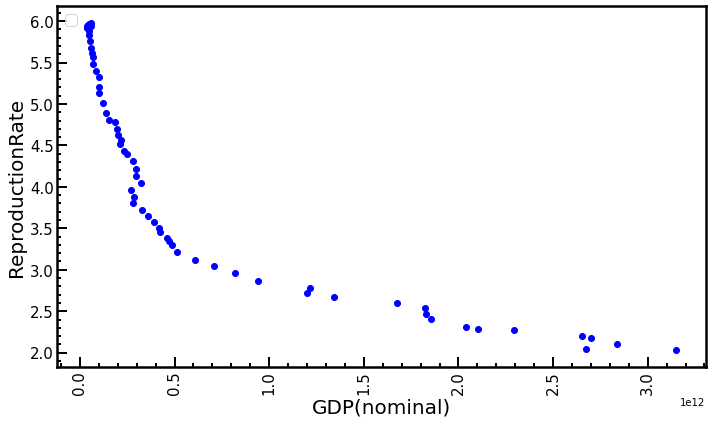

In [36]:
# Create a figure object
fig = plt.figure(figsize=(10,6))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Add a subplot to the figure
ax = fig.add_subplot(111)

ax.scatter(y_I,z1_I,color='b')

#plt.title("GDP growth (India)",fontsize=20)
plt.ylabel('ReproductionRate', fontsize=20)
plt.xlabel('GDP(nominal)', fontsize=20)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=4, width=2.0, direction='in')
#plt.ylim(-10000,800000)
#plt.xlim(0,17000)
plt.xticks(rotation=90)
plt.legend(loc="upper left", fontsize=15)
plt.tight_layout()
#plt.savefig("Images/Unit2.png")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


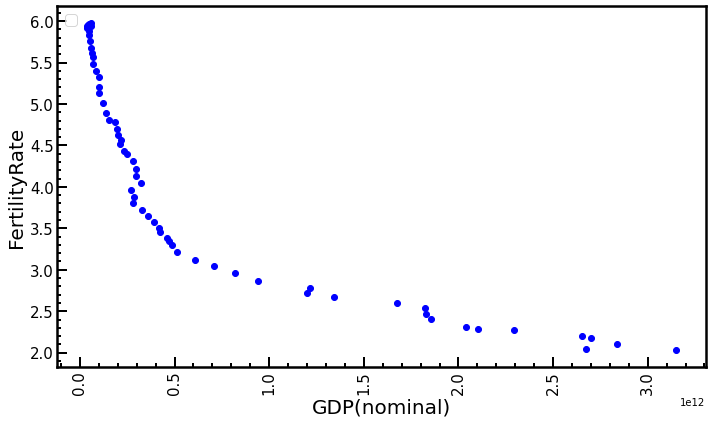

In [37]:
a = df.loc[(df['Country'] == 'India'), 'FertilityRate']

# Create a figure object
fig = plt.figure(figsize=(10,6))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Add a subplot to the figure
ax = fig.add_subplot(111)

ax.scatter(y_I,a,color='b')

#plt.title("GDP growth (India)",fontsize=20)
plt.ylabel('FertilityRate', fontsize=20)
plt.xlabel('GDP(nominal)', fontsize=20)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=4, width=2.0, direction='in')
#plt.ylim(-10000,800000)
#plt.xlim(0,17000)
plt.xticks(rotation=90)
plt.legend(loc="upper left", fontsize=15)
plt.tight_layout()
#plt.savefig("Images/Unit2.png")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


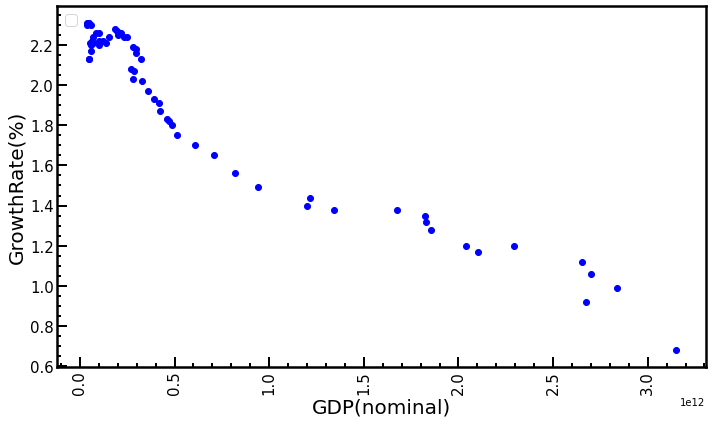

In [38]:
a = df.loc[(df['Country'] == 'India'), 'GrowthRate(%)']

# Create a figure object
fig = plt.figure(figsize=(10,6))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Add a subplot to the figure
ax = fig.add_subplot(111)

ax.scatter(y_I,a,color='b')

#plt.title("GDP growth (India)",fontsize=20)
plt.ylabel('GrowthRate(%)', fontsize=20)
plt.xlabel('GDP(nominal)', fontsize=20)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=4, width=2.0, direction='in')
#plt.ylim(-10000,800000)
#plt.xlim(0,17000)
plt.xticks(rotation=90)
plt.legend(loc="upper left", fontsize=15)
plt.tight_layout()
#plt.savefig("Images/Unit2.png")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


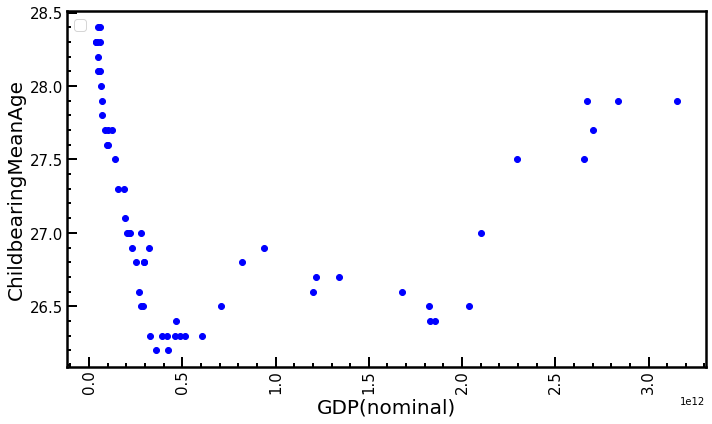

In [39]:
a = df.loc[(df['Country'] == 'India'), 'ChildbearingMeanAge']

# Create a figure object
fig = plt.figure(figsize=(10,6))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Add a subplot to the figure
ax = fig.add_subplot(111)

ax.scatter(y_I,a,color='b')

#plt.title("GDP growth (India)",fontsize=20)
plt.ylabel('ChildbearingMeanAge', fontsize=20)
plt.xlabel('GDP(nominal)', fontsize=20)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=4, width=2.0, direction='in')
#plt.ylim(-10000,800000)
#plt.xlim(0,17000)
plt.xticks(rotation=90)
plt.legend(loc="upper left", fontsize=15)
plt.tight_layout()
#plt.savefig("Images/Unit2.png")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


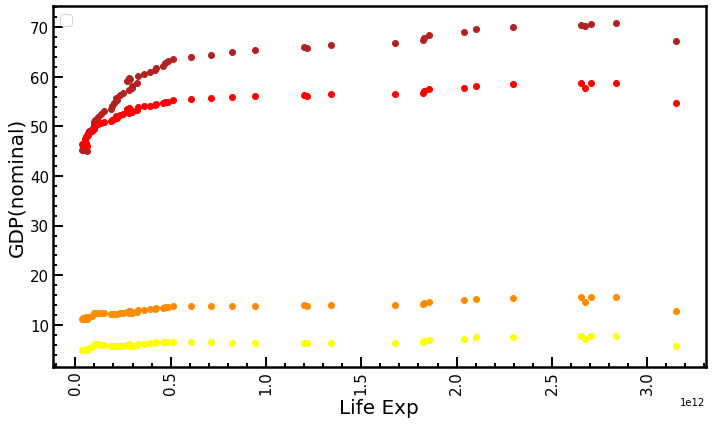

In [40]:
# Create a figure object
fig = plt.figure(figsize=(10,6))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Add a subplot to the figure
ax = fig.add_subplot(111)

plt.scatter(y_I,l1_I,color='firebrick')
plt.scatter(y_I,l2_I,color='red')
plt.scatter(y_I,l3_I,color='Darkorange')
plt.scatter(y_I,l4_I,color='Yellow')

#plt.title("GDP growth (India)",fontsize=20)
plt.xlabel("Life Exp", fontsize=20)
plt.ylabel("GDP(nominal)", fontsize=20)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=4, width=2.0, direction='in')
#plt.ylim(-10000,800000)
#plt.xlim(0,17000)
plt.xticks(rotation=90)
plt.legend(loc="upper left", fontsize=15)
plt.tight_layout()
#plt.savefig("Images/Unit2.png")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


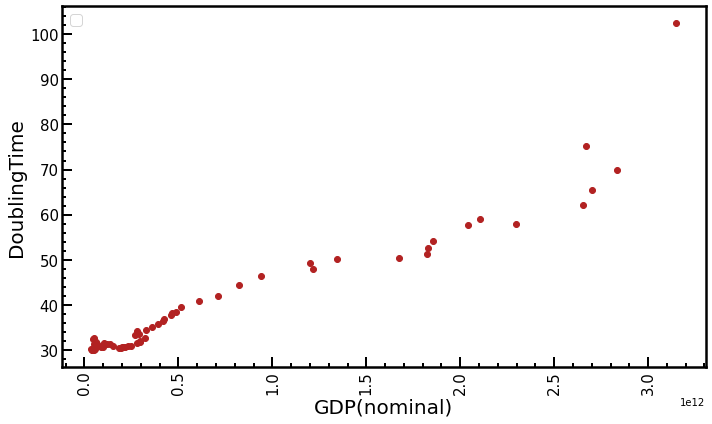

In [41]:
d_I    = df.loc[(df['Country'] == 'India'), 'DoublingTime']
# Create a figure object
fig = plt.figure(figsize=(10,6))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Add a subplot to the figure
ax = fig.add_subplot(111)

plt.scatter(y_I,d_I,color='firebrick')

#plt.title("GDP growth (India)",fontsize=20)
plt.ylabel("DoublingTime", fontsize=20)
plt.xlabel("GDP(nominal)", fontsize=20)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=4, width=2.0, direction='in')
#plt.ylim(-10000,800000)
#plt.xlim(0,17000)
plt.xticks(rotation=90)
plt.legend(loc="upper left", fontsize=15)
plt.tight_layout()
#plt.savefig("Images/Unit2.png")
plt.show()

In [42]:
x_N     = df.loc[(df['Country'] == 'Nigeria'), 'Year']
y_N     = df.loc[(df['Country'] == 'Nigeria'), 'GDP']
z1_N    = df.loc[(df['Country'] == 'Nigeria'), 'FertilityRate']
z2_N    = df.loc[(df['Country'] == 'Nigeria'), 'ReproductionRate']
l1_N    = df.loc[(df['Country'] == 'Nigeria'), 'LifeExp(Birth)']
l2_N    = df.loc[(df['Country'] == 'Nigeria'), 'LifeExp(15Y)']
l3_N    = df.loc[(df['Country'] == 'Nigeria'), 'LifeExp(65Y)']
l4_N    = df.loc[(df['Country'] == 'Nigeria'), 'LifeExp(80Y)']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


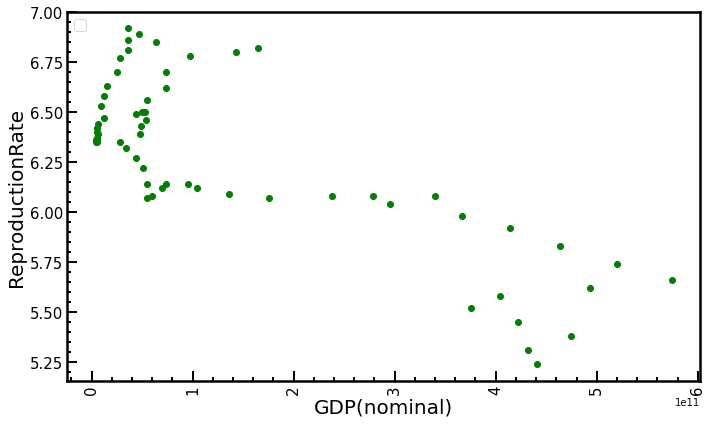

In [43]:
# Create a figure object
fig = plt.figure(figsize=(10,6))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Add a subplot to the figure
ax = fig.add_subplot(111)

ax.scatter(y_N,z1_N,color='green')

#plt.title("GDP growth (India)",fontsize=20)
plt.ylabel('ReproductionRate', fontsize=20)
plt.xlabel('GDP(nominal)', fontsize=20)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=4, width=2.0, direction='in')
#plt.ylim(-10000,800000)
#plt.xlim(0,17000)
plt.xticks(rotation=90)
plt.legend(loc="upper left", fontsize=15)
plt.tight_layout()
#plt.savefig("Images/Unit2.png")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


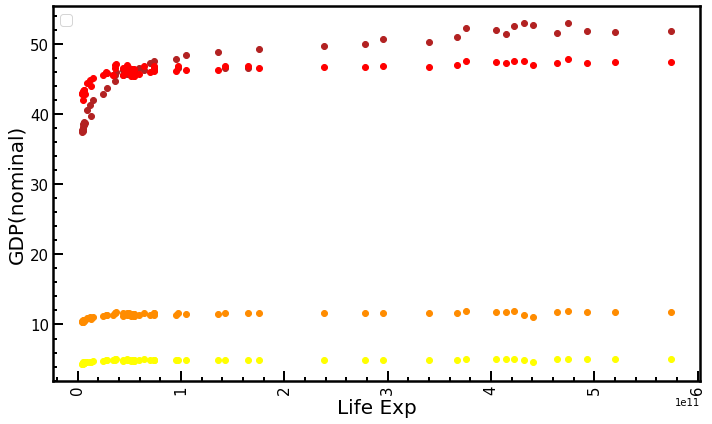

In [44]:
# Create a figure object
fig = plt.figure(figsize=(10,6))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Add a subplot to the figure
ax = fig.add_subplot(111)

plt.scatter(y_N,l1_N,color='firebrick')
plt.scatter(y_N,l2_N,color='red')
plt.scatter(y_N,l3_N,color='Darkorange')
plt.scatter(y_N,l4_N,color='Yellow')

#plt.title("GDP growth (India)",fontsize=20)
plt.xlabel("Life Exp", fontsize=20)
plt.ylabel("GDP(nominal)", fontsize=20)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=4, width=2.0, direction='in')
#plt.ylim(-10000,800000)
#plt.xlim(0,17000)
plt.xticks(rotation=90)
plt.legend(loc="upper left", fontsize=15)
plt.tight_layout()
#plt.savefig("Images/Unit2.png")
plt.show()

In [45]:
x_P     = df.loc[(df['Country'] == 'Poland'), 'Year']
y_P     = df.loc[(df['Country'] == 'Poland'), 'GDP']
z1_P    = df.loc[(df['Country'] == 'Poland'), 'FertilityRate']
z2_P    = df.loc[(df['Country'] == 'Poland'), 'ReproductionRate']
l1_P    = df.loc[(df['Country'] == 'Poland'), 'LifeExp(Birth)']
l2_P    = df.loc[(df['Country'] == 'Poland'), 'LifeExp(15Y)']
l3_P    = df.loc[(df['Country'] == 'Poland'), 'LifeExp(65Y)']
l4_P    = df.loc[(df['Country'] == 'Poland'), 'LifeExp(80Y)']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


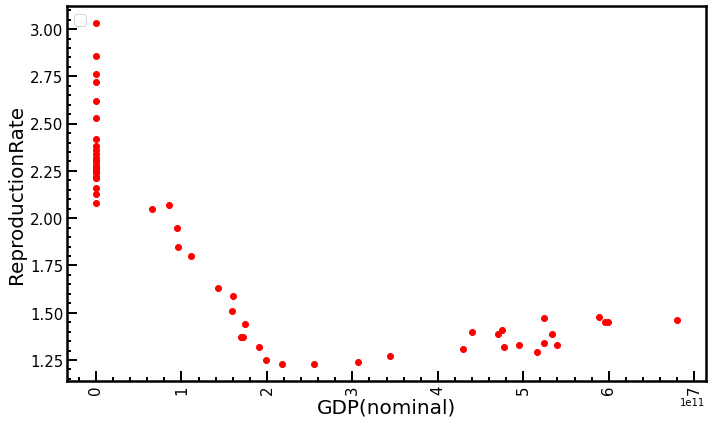

In [46]:
# Create a figure object
fig = plt.figure(figsize=(10,6))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Add a subplot to the figure
ax = fig.add_subplot(111)

ax.scatter(y_P,z1_P,color='red')

#plt.title("GDP growth (India)",fontsize=20)
plt.ylabel('ReproductionRate', fontsize=20)
plt.xlabel('GDP(nominal)', fontsize=20)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=4, width=2.0, direction='in')
#plt.ylim(-10000,800000)
#plt.xlim(0,17000)
plt.xticks(rotation=90)
plt.legend(loc="upper left", fontsize=15)
plt.tight_layout()
#plt.savefig("Images/Unit2.png")
plt.show()

In [47]:
x_B     = df.loc[(df['Country'] == 'Brazil'), 'Year']
y_B     = df.loc[(df['Country'] == 'Brazil'), 'GDP']
z1_B    = df.loc[(df['Country'] == 'Brazil'), 'FertilityRate']
z2_B    = df.loc[(df['Country'] == 'Brazil'), 'ReproductionRate']
l1_B    = df.loc[(df['Country'] == 'Brazil'), 'LifeExp(Birth)']
l2_B    = df.loc[(df['Country'] == 'Brazil'), 'LifeExp(15Y)']
l3_B    = df.loc[(df['Country'] == 'Brazil'), 'LifeExp(65Y)']
l4_B    = df.loc[(df['Country'] == 'Brazil'), 'LifeExp(80Y)']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


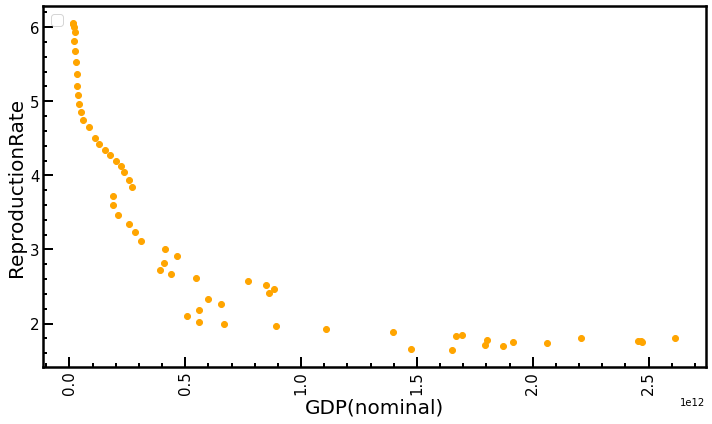

In [48]:
# Create a figure object
fig = plt.figure(figsize=(10,6))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Add a subplot to the figure
ax = fig.add_subplot(111)

ax.scatter(y_B,z1_B,color='orange')

#plt.title("GDP growth (India)",fontsize=20)
plt.ylabel('ReproductionRate', fontsize=20)
plt.xlabel('GDP(nominal)', fontsize=20)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=4, width=2.0, direction='in')
#plt.ylim(-10000,800000)
#plt.xlim(0,17000)
plt.xticks(rotation=90)
plt.legend(loc="upper left", fontsize=15)
plt.tight_layout()
#plt.savefig("Images/Unit2.png")
plt.show()

In [49]:
x_U     = df.loc[(df['Code'] == 'CHN'), 'Year']
y_U     = df.loc[(df['Code'] == 'CHN'), 'GDP']
z1_U    = df.loc[(df['Code'] == 'CHN'), 'FertilityRate']
z2_U    = df.loc[(df['Code'] == 'CHN'), 'ReproductionRate']
l1_U    = df.loc[(df['Code'] == 'CHN'), 'LifeExp(Birth)']
l2_U    = df.loc[(df['Code'] == 'CHN'), 'LifeExp(15Y)']
l3_U    = df.loc[(df['Code'] == 'CHN'), 'LifeExp(65Y)']
l4_U    = df.loc[(df['Code'] == 'CHN'), 'LifeExp(80Y)']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


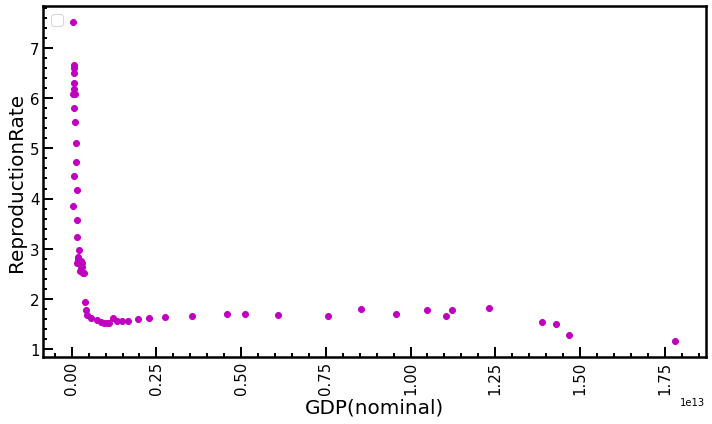

In [50]:
# Create a figure object
fig = plt.figure(figsize=(10,6))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Add a subplot to the figure
ax = fig.add_subplot(111)

ax.scatter(y_U,z1_U,color='m')

#plt.title("GDP growth (India)",fontsize=20)
plt.ylabel('ReproductionRate', fontsize=20)
plt.xlabel('GDP(nominal)', fontsize=20)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=4, width=2.0, direction='in')
#plt.ylim(-10000,800000)
#plt.xlim(0,17000)
plt.xticks(rotation=90)
plt.legend(loc="upper left", fontsize=15)
plt.tight_layout()
#plt.savefig("Images/Unit2.png")
plt.show()

NameError: name 'x' is not defined

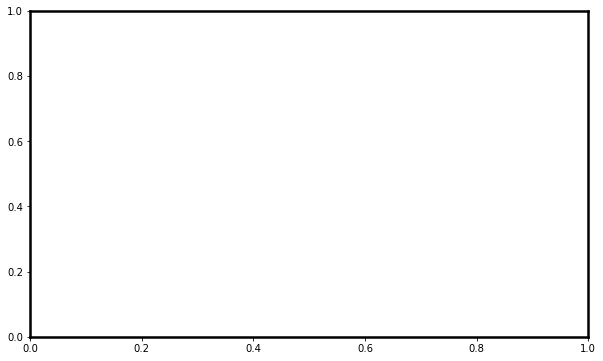

In [51]:
# Create a figure object
fig = plt.figure(figsize=(10,6))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Add a subplot to the figure
ax = fig.add_subplot(111)

ax.scatter(x,y,color='firebrick')

    
plt.title("GDP growth (India)",fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.ylabel("GDP(nominal)", fontsize=20)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=4, width=2.0, direction='in')
#plt.ylim(-10000,800000)
#plt.xlim(0,17000)
plt.xticks(rotation=90)
plt.legend(loc="upper left", fontsize=15)
plt.tight_layout()
#plt.savefig("Images/Unit2.png")
plt.show()

In [ ]:
# Create a figure object
fig = plt.figure(figsize=(10,6))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Add a subplot to the figure
ax = fig.add_subplot(111)

ax.scatter(x,z1,color='firebrick')

    
plt.title("GDP growth (India)",fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.ylabel("GDP(nominal)", fontsize=20)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=4, width=2.0, direction='in')
#plt.ylim(-10000,800000)
#plt.xlim(0,17000)
plt.xticks(rotation=90)
plt.legend(loc="upper left", fontsize=15)
plt.tight_layout()
#plt.savefig("Images/Unit2.png")
plt.show()

In [ ]:
# Create a figure object
fig = plt.figure(figsize=(10,6))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Add a subplot to the figure
ax = fig.add_subplot(111)

ax.scatter(x,z2,color='firebrick')

    
plt.title("GDP growth (India)",fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.ylabel("GDP(nominal)", fontsize=20)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=4, width=2.0, direction='in')
#plt.ylim(-10000,800000)
#plt.xlim(0,17000)
plt.xticks(rotation=90)
plt.legend(loc="upper left", fontsize=15)
plt.tight_layout()
#plt.savefig("Images/Unit2.png")
plt.show()

In [ ]:
# Create a figure object
fig = plt.figure(figsize=(10,6))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Add a subplot to the figure
ax = fig.add_subplot(111)

plt.scatter(x,l1,color='firebrick')
plt.scatter(x,l2,color='red')
plt.scatter(x,l3,color='Darkorange')
plt.scatter(x,l4,color='Yellow')

    
plt.title("GDP growth (India)",fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.ylabel("GDP(nominal)", fontsize=20)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=2.0, direction='in', labelsize=15, labelcolor='k')
plt.tick_params(which='minor', length=4, width=2.0, direction='in')
#plt.ylim(-10000,800000)
#plt.xlim(0,17000)
plt.xticks(rotation=90)
plt.legend(loc="upper left", fontsize=15)
plt.tight_layout()
#plt.savefig("Images/Unit2.png")
plt.show()